In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data16=pd.read_excel("AQI 2016 (1).xls")

In [ ]:
data17=pd.read_excel("AQI 2017.xlsx")

In [ ]:
data18=pd.read_excel("2018_AQI.xlsx")

In [ ]:
data19=pd.read_excel("2019_AQI.xlsx")

In [ ]:
data20=pd.read_excel("2020_AQI.xlsx")

In [ ]:
data21=pd.read_excel("2021_AQI.xlsx")

In [ ]:
data22=pd.read_excel("2022_AQI.xlsx")

In [ ]:
data22

,Location,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
0,Nizamabad,56,59.000000,64.000000,58.000000,56.222222,54,46.000000,53,54,63,56,59
1,Adilabad,54,55.000000,56.000000,65.000000,60.148148,58,48.000000,56,56,65,58,62
2,"Kuda, warangal",58,64.000000,49.105826,66.173930,53.704530,72,40.428571,43,41,64,49,116
3,"Mee-Seva, Warangal",73,72.514053,76.057747,60.080031,77.094650,85,47.268637,56,48,64,94,94
4,Karimnagar,82,90.333333,95.666667,69.926215,76.241282,89,69.197791,55,58,63,101,126
5,Khammam,80,78.079300,76.518519,79.365731,76.611111,81,72.500000,58,42,57,78,115


# Dataset of Adilabad

In [ ]:
Adilabad_data=list(data16.T[1][1:-6])+list(data17.T[1][1:-1])+list(data18.T[1][1:])+list(data19.T[1][1:])+list(data20.T[1][1:])+list(data21.T[1][1:])+list(data22.T[1][1:])

dt=Adilabad_data

dt

[67.0,
 68.0,
 71.0,
 70.0,
 71.0,
 40.0,
 60.0,
 61.0,
 58.0,
 67.0,
 63.0,
 65,
 63.666666666666664,
 63.55555555555556,
 67.66666666666667,
 68.96296296296298,
 70.62962962962963,
 65.62962962962963,
 62.0,
 59.55555555555556,
 61.44444444444444,
 65.11111111111111,
 63.44444444444444,
 63.629629629629626,
 66.1111111111111,
 67.0,
 70.3333333333333,
 73.5185185185185,
 74.1111111111111,
 68.6666666666667,
 63.7777777777778,
 64.0,
 61.5555555555556,
 67.1111111111111,
 74.7777777777778,
 81,
 76.3333333333333,
 76.7777777777778,
 78.5555555555556,
 78.0,
 80.3333333333333,
 76.5555555555556,
 78.0,
 79.0,
 73.4444444444444,
 72.3703703703704,
 78.6666666666667,
 73.3703703703704,
 78.0,
 81.7037037037037,
 70.8148148148148,
 51.5,
 72,
 74.0,
 74,
 72.0,
 72,
 72,
 72.0,
 72.0,
 69.0,
 62,
 73,
 74,
 67,
 69,
 69,
 69,
 69.0,
 69,
 69,
 69.0,
 54,
 55.0,
 56.0,
 65.0,
 60.1481481481481,
 58,
 48.0,
 56,
 56,
 65,
 58,
 62]

In [ ]:
L=['1-1-2016','1-2-2016','1-3-2016','1-4-2016','1-5-2016','1-6-2016','1-7-2016','1-8-2016','1-9-2016','1-10-2016','1-11-2016','1-12-2016','1-1-2017','1-2-2017','1-3-2017','1-4-2017','1-5-2017','1-6-2017','1-7-2017','1-8-2017','1-9-2017','1-10-2017','1-11-2017','1-12-2017']
L=L+['1-1-2018','1-2-2018','1-3-2018','1-4-2018','1-5-2018','1-6-2018','1-7-2018','1-8-2018','1-9-2018','1-10-2018','1-11-2018','1-12-2018']
L=L+['1-1-2019','1-2-2019','1-3-2019','1-4-2019','1-5-2019','1-6-2019','1-7-2019','1-8-2019','1-9-2019','1-10-2019','1-11-2019','1-12-2019']
L=L+['1-1-2020','1-2-2020','1-3-2020','1-4-2020','1-5-2020','1-6-2020','1-7-2020','1-8-2020','1-9-2020','1-10-2020','1-11-2020','1-12-2020']
L=L+['1-1-2021','1-2-2021','1-3-2021','1-4-2021','1-5-2021','1-6-2021','1-7-2021','1-8-2021','1-9-2021','1-10-2021','1-11-2021','1-12-2021']
L=L+['1-1-2022','1-2-2022','1-3-2022','1-4-2022','1-5-2022','1-6-2022','1-7-2022','1-8-2022','1-9-2022','1-10-2022','1-11-2022','1-12-2022']
L

['1-1-2016',
 '1-2-2016',
 '1-3-2016',
 '1-4-2016',
 '1-5-2016',
 '1-6-2016',
 '1-7-2016',
 '1-8-2016',
 '1-9-2016',
 '1-10-2016',
 '1-11-2016',
 '1-12-2016',
 '1-1-2017',
 '1-2-2017',
 '1-3-2017',
 '1-4-2017',
 '1-5-2017',
 '1-6-2017',
 '1-7-2017',
 '1-8-2017',
 '1-9-2017',
 '1-10-2017',
 '1-11-2017',
 '1-12-2017',
 '1-1-2018',
 '1-2-2018',
 '1-3-2018',
 '1-4-2018',
 '1-5-2018',
 '1-6-2018',
 '1-7-2018',
 '1-8-2018',
 '1-9-2018',
 '1-10-2018',
 '1-11-2018',
 '1-12-2018',
 '1-1-2019',
 '1-2-2019',
 '1-3-2019',
 '1-4-2019',
 '1-5-2019',
 '1-6-2019',
 '1-7-2019',
 '1-8-2019',
 '1-9-2019',
 '1-10-2019',
 '1-11-2019',
 '1-12-2019',
 '1-1-2020',
 '1-2-2020',
 '1-3-2020',
 '1-4-2020',
 '1-5-2020',
 '1-6-2020',
 '1-7-2020',
 '1-8-2020',
 '1-9-2020',
 '1-10-2020',
 '1-11-2020',
 '1-12-2020',
 '1-1-2021',
 '1-2-2021',
 '1-3-2021',
 '1-4-2021',
 '1-5-2021',
 '1-6-2021',
 '1-7-2021',
 '1-8-2021',
 '1-9-2021',
 '1-10-2021',
 '1-11-2021',
 '1-12-2021',
 '1-1-2022',
 '1-2-2022',
 '1-3-2022',
 '1-4-2

In [ ]:
df=pd.DataFrame()
df.reset_index()
df["Date"]=L
df["AQI"]=dt

In [ ]:
df1=df[["Date","AQI"]]
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y').dt.strftime('%m-%Y')

df["Date"]=pd.to_datetime(df["Date"])
print(df2)
x=df["Date"]
y=df["AQI"]
#plt.plot(x,y)
df=df.set_index("Date")

       Date        AQI
72  01-2022  69.817473
73  02-2022  68.547019
74  03-2022  72.402495
75  04-2022  69.426534
76  05-2022  69.655308
77  06-2022  50.434292
78  07-2022  64.825030
79  08-2022  65.876012
80  09-2022  62.875621
81  10-2022  68.021373
82  11-2022  66.230453
83  12-2022  67.520163


In [ ]:
df

,AQI
Date,
2016-01-01,67.0
2016-01-02,68.0
2016-01-03,71.0
2016-01-04,70.0
2016-01-05,71.0
...,...
2022-01-08,56.0
2022-01-09,56.0
2022-01-10,65.0


In [ ]:
df1["Date"]

0     01-2016
1     02-2016
2     03-2016
3     04-2016
4     05-2016
       ...   
79    08-2022
80    09-2022
81    10-2022
82    11-2022
83    12-2022
Name: Date, Length: 84, dtype: object

# AQI levels of Adilabad between 2016 and 2022

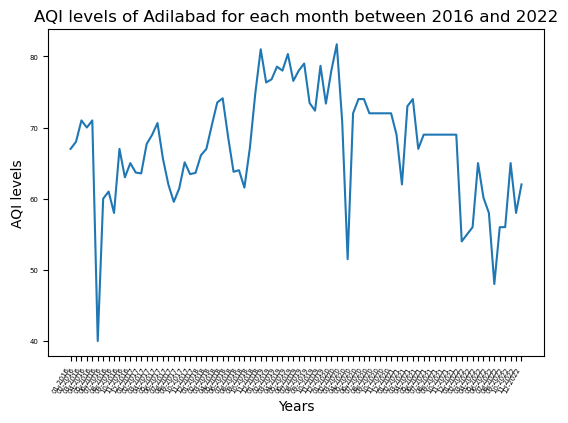

In [ ]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"],y, marker='', linestyle='-')

fig.autofmt_xdate()


plt.title("AQI levels of Adilabad for each month between 2016 and 2022")
plt.xlabel("Years")
plt.ylabel("AQI levels")

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(5)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=666)

In [ ]:
from statsmodels.tsa.stattools import adfuller
dfa=adfuller(df)
print("The p-value of the dataset is",dfa[1])

The p-value of the dataset is 0.0004326362011711683


In [ ]:
#plt.plot(df)

In [ ]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
fit=auto_arima(df["AQI"],trace=True,suppress_warning=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=548.621, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=585.753, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=547.084, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=560.573, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=949.194, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=547.785, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=546.847, Time=0.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=547.496, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=546.708, Time=0.36 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=555.104, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=548.547, Time=0.54 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=554.036, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=550.042, Time=0.58 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=552.095, Time=0.19 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -268.354
Date:                Sat, 04 Mar 2023   AIC                            546.708
Time:                        18:42:32   BIC                            558.862
Sample:                             0   HQIC                           551.594
                                 - 84                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.2812      7.087      0.745      0.456      -8.608      19.171
ar.L1          0.9209      0.104      8.861      0.000       0.717       1.125
ma.L1         -0.4368      0.128     -3.421      0.001      -0.687      -0.187
ma.L2         -0.1782      0.203     -0.877      0.380      -0.576       0.220
sigma2        34.5664      3.914      8.830      0.000      26.894      42.239
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               254.70
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -2.08
Prob(H) (two-sided):                  0.24   Kurtosis:                        10.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
'''df.sort_index(inplace=True)
df'''

'df.sort_index(inplace=True)\ndf'

In [ ]:
train=df.iloc[:-12]
test=df.iloc[-12:]

# ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA 
print(train)
model =ARIMA(train,order=(1,0,2),seasonal_order=(9,1,2,12))
model_fit =model.fit()
model_fit.summary()

             AQI
Date            
2016-01-01  67.0
2016-01-02  68.0
2016-01-03  71.0
2016-01-04  70.0
2016-01-05  71.0
...          ...
2021-01-08  69.0
2021-01-09  69.0
2021-01-10  69.0
2021-01-11  69.0
2021-01-12  69.0

[72 rows x 1 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              AQI   No. Observations:                   72
Model:             ARIMA(1, 0, 2)x(9, 1, 2, 12)   Log Likelihood                -198.404
Date:                          Sat, 04 Mar 2023   AIC                            426.808
Time:                                  18:43:43   BIC                            458.223
Sample:                                       0   HQIC                           439.096
                                           - 72                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9933      1.300      0.764      0.445      -1.556       3.542
ma.L1         -0.4070      0.209     -1.950      0.051      -0.816       0.002
ma.L2         -0.3547      0.366     -0.969      0.332      -1.072       0.363
ar.S.L12      -0.9971   1323.654     -0.001      0.999   -2595.312    2593.317
ar.S.L24      -0.6292    966.853     -0.001      0.999   -1895.627    1894.368
ar.S.L36      -0.5893    886.506     -0.001      0.999   -1738.110    1736.931
ar.S.L48      -0.6585    673.683     -0.001      0.999   -1321.052    1319.735
ar.S.L60      -1.0169    797.761     -0.001      0.999   -1564.600    1562.566
ar.S.L72      -0.5863   1288.279     -0.000      1.000   -2525.567    2524.394
ar.S.L84       0.1721    396.613      0.000      1.000    -777.176     777.520
ar.S.L96       0.0820    376.636      0.000      1.000    -738.111     738.275
ar.S.L108      0.0153    395.632   3.88e-05      1.000    -775.409     775.440
ma.S.L12      -0.6791   1760.967     -0.000      1.000   -3452.112    3450.754
ma.S.L24      -0.0377    453.708   -8.3e-05      1.000    -889.289     889.214
sigma2         4.6568   2.18e+04      0.000      1.000   -4.26e+04    4.26e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                41.34
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                            -0.35
Prob(H) (two-sided):                  0.14   Kurtosis:                         7.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

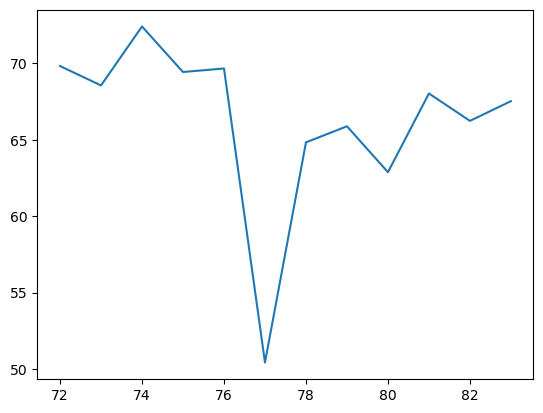

In [ ]:
pred_new=model_fit.forecast(12)
plt.plot(pred_new)

In [ ]:
#res.index

In [ ]:
time_list=['1-1-2022','1-2-2022','1-3-2022','1-4-2022','1-5-2022','1-6-2022','1-7-2022','1-8-2022','1-9-2022','1-10-2022','1-11-2022','1-12-2022']
res=pd.DataFrame(pred_new)
res["Date"]=time_list
a=list(res['predicted_mean'])
res["AQI"]=a
res=res.drop(["predicted_mean"],axis=1)
res["Date"]=pd.to_datetime(res["Date"])
df2=res[["Date","AQI"]]
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%d-%m').dt.strftime('%d-%Y')
res=res.set_index("Date")

In [ ]:
final_data =train
pred_data=final_data.append(res)

In [ ]:
#df2

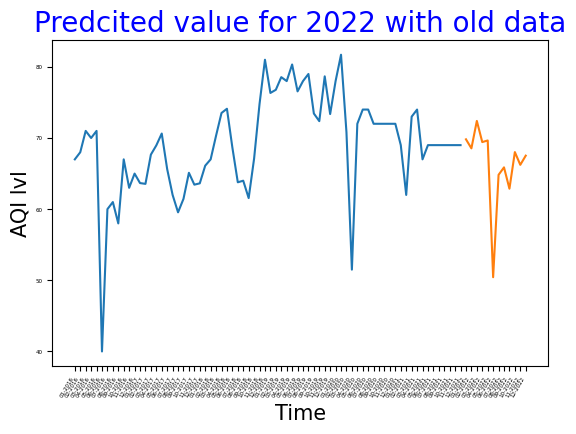

In [ ]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"][:-12],df1["AQI"][:-12], marker='', linestyle='-')
ax.plot_date(df2["Date"],df2["AQI"] ,marker='', linestyle='-')
fig.autofmt_xdate()


plt.title("Predcited value for 2022 with old data",fontsize = 20,c='b')
plt.xlabel("Time",fontsize = 15)
plt.ylabel("AQI lvl",fontsize = 15)

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(4)
plt.show()



# Performance of the model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
L=[]
for i in pred:
    L.append(i)
l=list(test["AQI"])
rmse=sqrt(mean_squared_error(pred,test["AQI"]))
ame=mean_absolute_error(pred,test["AQI"])

print("Average Temperature         : ",df['AQI'].mean())
print("Root mean Square value      : ",rmse)
print("Mean absolute Error         : ",ame)

Average Temperature         :  67.53373015873015
Root mean Square value      :  10.821309767865095
Mean absolute Error         :  9.801253552926267


# Forcasting for 2023

In [ ]:
model =ARIMA(df,order=(1,0,2),seasonal_order=(9,1,2,12))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              AQI   No. Observations:                   84
Model:             ARIMA(1, 0, 2)x(9, 1, 2, 12)   Log Likelihood                -240.421
Date:                          Sat, 04 Mar 2023   AIC                            510.841
Time:                                  18:44:49   BIC                            544.991
Sample:                                       0   HQIC                           524.437
                                           - 84                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9836      0.324      3.034      0.002       0.348       1.619
ma.L1         -0.4548      0.156     -2.924      0.003      -0.760      -0.150
ma.L2         -0.2579      0.219     -1.177      0.239      -0.687       0.172
ar.S.L12      -0.6484   2451.852     -0.000      1.000   -4806.189    4804.893
ar.S.L24      -0.7680   2140.530     -0.000      1.000   -4196.129    4194.594
ar.S.L36      -1.0100   1274.644     -0.001      0.999   -2499.266    2497.246
ar.S.L48      -0.8646   1339.285     -0.001      0.999   -2625.816    2624.087
ar.S.L60      -0.8130   1316.257     -0.001      1.000   -2580.630    2579.004
ar.S.L72      -1.2388   1191.057     -0.001      0.999   -2335.668    2333.190
ar.S.L84      -0.3641   1712.321     -0.000      1.000   -3356.451    3355.723
ar.S.L96      -0.3203   1785.444     -0.000      1.000   -3499.727    3499.086
ar.S.L108     -0.2853   2043.557     -0.000      1.000   -4005.584    4005.014
ma.S.L12      -0.2896   4323.502   -6.7e-05      1.000   -8474.198    8473.619
ma.S.L24      -0.4263   6446.698  -6.61e-05      1.000   -1.26e+04    1.26e+04
sigma2         4.6976   1.58e+04      0.000      1.000    -3.1e+04     3.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                23.00
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -0.24
Prob(H) (two-sided):                  0.71   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_new =model_fit.forecast(12)
print("The predicted AQI values of each month of 2023 is:\n",pd.DataFrame(pred_new))

The predicted AQI values of each month of 2023 is:
     predicted_mean
84       60.942907
85       62.829221
86       64.357296
87       67.650173
88       65.855034
89       37.942983
90       52.902950
91       58.592596
92       54.641484
93       65.847172
94       60.798560
95       64.679057


In [ ]:
res=pd.DataFrame(pred_new)
res.columns=["AQI"]
time_list=['1-1-2023','1-2-2023','1-3-2023','1-4-2023','1-5-2023','1-6-2023','1-7-2023','1-8-2023','1-9-2023','1-10-2023','1-11-2023','1-12-2023']
res["AQI"]=pred_new
res["Date"]=time_list
res["Date"]=pd.to_datetime(res["Date"])
res['Date'] = pd.to_datetime(res['Date'], format='%Y-%d-%m').dt.strftime('%d-%Y')
res=res.set_index("Date")
res

,AQI
Date,
01-2023,60.942907
02-2023,62.829221
03-2023,64.357296
04-2023,67.650173
05-2023,65.855034
06-2023,37.942983
07-2023,52.902950
08-2023,58.592596
09-2023,54.641484


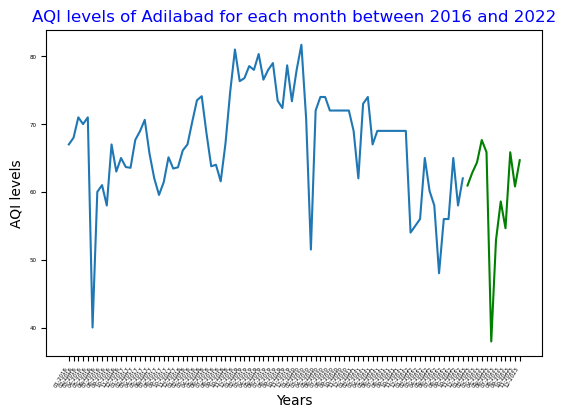

In [ ]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"],y, marker='', linestyle='-')
plt.plot(res,c='g')

fig.autofmt_xdate()


plt.title("AQI levels of Adilabad for each month between 2016 and 2022",c='b')
plt.xlabel("Years")
plt.ylabel("AQI levels")

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(4)
plt.show()
